In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib notebook

# Strategy 1 - Unconnected Imprint with IP

Vector of neurons with membrane potentials $\vec{U}(t)$ and thresholds $\vec{T}(t)$ receive static input $\vec{U}_I(t)$. The discrete-time system evolves according to the following equations

$\vec{U}(t + \Delta t) = \Theta \bigl(\vec{U}(t) + \vec{U}_I(t) - \vec{T}(t) \bigr)$

$\vec{T}(t + \Delta t) = \vec{T}(t) + \alpha(V(t) - U_0)$

Plan
* Input picture, adapt thresholds
* Input noise, fix thresholds, receive picture

In [2]:
updateU = lambda U,I,T: (U + I > T).astype(int)
updateT = lambda U,T:   T + alpha*(U - U0)

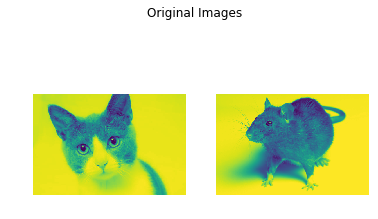

In [3]:
# Load raw images
catImg   = mpimg.imread('../img/cat2.png')
mouseImg = mpimg.imread('../img/rat2.png')[:,:,0]
dim = catImg.shape

# Plot raw images
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(catImg)
axis[1].imshow(mouseImg)
axis[0].set_axis_off()
axis[1].set_axis_off()
plt.suptitle('Original Images')
plt.show()

# Initialize random receptor neurons and thresholds

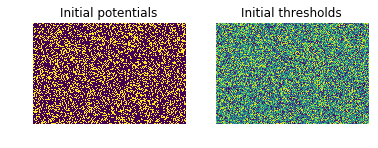

In [4]:
# Initialize random receptor neurons and thresholds
alpha = 0.01
U = (np.random.rand(dim[0], dim[1]) < 0.3).astype(int)
T = np.random.rand(dim[0], dim[1])
U0 = 0.5 * np.ones(dim)

# Plot initial neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Initial potentials')
axis[1].set_title('Initial thresholds')
plt.show()

# Expose cat

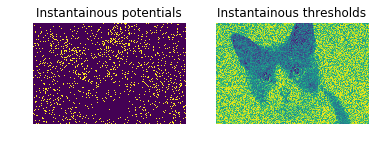

In [5]:
# Expose cat
N_Expose = 2000
for i in range(N_Expose):
    UNew = updateU(U, catImg, T)
    T    = updateT(U, T)
    U    = UNew
    
# Plot resulting neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Instantainous potentials')
axis[1].set_title('Instantainous thresholds')
plt.show()

# Turn off HP, Show random noise, collect statistics

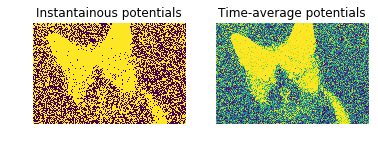

In [6]:
# Input noise into system, integrate state
N_Sample = 1000
Out = np.zeros(dim)
for i in range(N_Sample):
    noise = 2 * np.random.rand(dim[0], dim[1])
    U = updateU(U, noise, T)
    Out += U
    
Out /= N_Sample

# Plot integrated neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(Out)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Instantainous potentials')
axis[1].set_title('Time-average potentials')
plt.show()

# Expose mouse

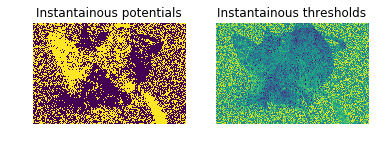

In [7]:
# Expose mouse
for i in range(10*N_Expose):
    UNew = updateU(U, mouseImg, T)
    T    = updateT(U, T)
    U    = UNew
    
# Plot resulting neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(T)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Instantainous potentials')
axis[1].set_title('Instantainous thresholds')
plt.show()

# Turn off HP, Show random noise, collect statistics

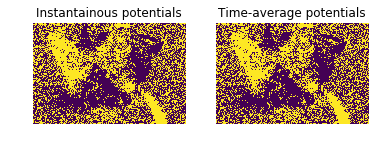

In [8]:
# Input noise into system, integrate state
Out = np.zeros(dim)
for i in range(N_Sample):
    noise = 2 * np.random.rand(dim[0], dim[1])
    UNew = updateU(U, mouseImg, T)
    Out += U
    
Out /= N_Sample

# Plot integrated neural state
fig, axis = plt.subplots(ncols=2)
axis[0].imshow(U)
axis[1].imshow(Out)
axis[0].set_axis_off()
axis[1].set_axis_off()
axis[0].set_title('Instantainous potentials')
axis[1].set_title('Time-average potentials')
plt.show()